목표 : A구와 B구의 승용차 이용률 평균을 비교하여 유의미한 차이가 있는지 검정

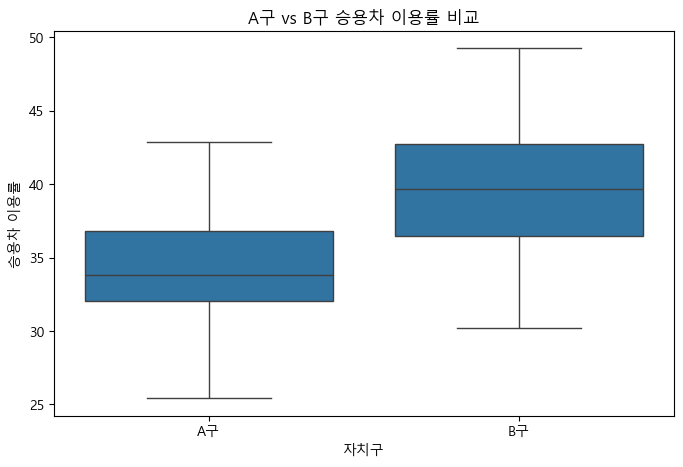

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'


# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 랜덤 시드 설정
np.random.seed(42)

# A구와 B구의 승용차 이용률 데이터 생성
a_district = np.random.normal(loc=35, scale=5, size=30)  # A구 (평균 35%, 표준편차 5%)
b_district = np.random.normal(loc=40, scale=5, size=30)  # B구 (평균 40%, 표준편차 5%)

# 데이터프레임 생성
df = pd.DataFrame({'승용차 이용률': np.concatenate([a_district, b_district]),
                   '자치구': ['A구'] * 30 + ['B구'] * 30})

# 데이터 시각화 (박스플롯)
plt.figure(figsize=(8, 5))
sns.boxplot(x='자치구', y='승용차 이용률', data=df)
plt.title("A구 vs B구 승용차 이용률 비교")
plt.show()


In [2]:
# 정규성 검정 수행 (Shapiro-Wilk Test)
shapiro_a = stats.shapiro(a_district)
shapiro_b = stats.shapiro(b_district)

print(f"Shapiro-Wilk test (A구): p-value = {shapiro_a.pvalue:.4f}")
print(f"Shapiro-Wilk test (B구): p-value = {shapiro_b.pvalue:.4f}")

# 정규성 판정
if shapiro_a.pvalue > 0.05 and shapiro_b.pvalue > 0.05:
    print("두 그룹 모두 정규성을 만족함")
else:
    print("정규성이 만족되지 않음, 비모수 검정 필요")


Shapiro-Wilk test (A구): p-value = 0.6868
Shapiro-Wilk test (B구): p-value = 0.9130
두 그룹 모두 정규성을 만족함


In [4]:
# 등분산 검정 (Levene’s Test)
levene_test = stats.levene(a_district, b_district)

# 결과 출력
print(f"Shapiro-Wilk test (A구): p-value = {shapiro_a.pvalue:.4f}")
print(f"Shapiro-Wilk test (B구): p-value = {shapiro_b.pvalue:.4f}")
print(f"Levene’s test: p-value = {levene_test.pvalue:.4f}")

Shapiro-Wilk test (A구): p-value = 0.6868
Shapiro-Wilk test (B구): p-value = 0.9130
Levene’s test: p-value = 0.6223


In [6]:
# t-검정 수행 (등분산 여부에 따라 결정)
if levene_test.pvalue > 0.05:
    print("등분산을 가정한 독립표본 t-검정 수행")
    t_stat, p_value = stats.ttest_ind(a_district, b_district, equal_var=True)
else:
    print("등분산을 가정하지 않는 Welch’s t-test 수행")
    t_stat, p_value = stats.ttest_ind(a_district, b_district, equal_var=False)

print(f"t-통계량 = {t_stat:.4f}, p-value = {p_value:.4f}")

# 결과 해석
if p_value < 0.05:
    print("두 집단의 평균 차이가 유의미함 (귀무가설 기각)")
else:
    print("두 집단의 평균 차이가 유의미하지 않음 (귀무가설 유지)")


등분산을 가정한 독립표본 t-검정 수행
t-통계량 = -4.5129, p-value = 0.0000
두 집단의 평균 차이가 유의미함 (귀무가설 기각)
